In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [4]:
data = pd.read_csv("/Users/joel/Downloads/coffee_survey.csv")
print(data.shape)
data.head()



(4042, 57)


,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
null_counts = data.isnull().sum()
print("Null Value Counts: ", null_counts)

Null Value Counts:  submission_id                      0
age                               31
cups                              93
where_drink                       70
brew                             385
brew_other                      3364
purchase                        3332
purchase_other                  4011
favorite                          62
favorite_specify                3928
additions                         83
additions_other                 3994
dairy                           2356
sweetener                       3530
style                             84
strength                         126
roast_level                      102
caffeine                         125
expertise                        104
coffee_a_bitterness              244
coffee_a_acidity                 263
coffee_a_personal_preference     253
coffee_a_notes                  1464
coffee_b_bitterness              262
coffee_b_acidity                 275
coffee_b_personal_preference     269
coffee_b_notes    

In [89]:
# only taking cols i need
cols = [
    'coffee_a_bitterness','coffee_a_acidity','coffee_a_personal_preference', 'coffee_a_notes',
    'coffee_b_bitterness', 'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_b_notes',
    'coffee_c_bitterness', 'coffee_c_acidity', 'coffee_c_personal_preference', 'coffee_c_notes',
    'coffee_d_bitterness', 'coffee_d_acidity', 'coffee_d_personal_preference', 'coffee_d_notes',
    'style', 'roast_level', 
]
data = data[cols]
#dropping null rows as its causing problems when testing with the model
data.dropna(inplace=True)
data.head()

,coffee_a_bitterness,coffee_a_acidity,coffee_a_personal_preference,coffee_a_notes,coffee_b_bitterness,coffee_b_acidity,coffee_b_personal_preference,coffee_b_notes,coffee_c_bitterness,coffee_c_acidity,coffee_c_personal_preference,coffee_c_notes,coffee_d_bitterness,coffee_d_acidity,coffee_d_personal_preference,coffee_d_notes,style,roast_level
15,1.0,1.0,1.0,a,1.0,1.0,1.0,b,1.0,1.0,1.0,c,1.0,1.0,1.0,d,Bright,Light
53,4.0,3.0,3.0,"Bitter, soft",2.0,3.0,2.0,"Hazelnut, bold",2.0,4.0,1.0,Dark roast,2.0,2.0,5.0,"Fruity, light",Nutty,Light
54,1.0,1.0,1.0,This is just an audit to test if outliers are ...,2.0,2.0,2.0,I personally did not have a tasting kit,3.0,3.0,3.0,But the form does not ask me for a kit identifier,4.0,4.0,4.0,A small mistake to fix next time ;),Nutty,Medium
64,2.0,4.0,4.0,"Fruity aroma, lighter mouthfeel, lemony-citrus...",4.0,2.0,4.0,"Darker, chocolatey, least aromatic/metallic sm...",4.0,3.0,3.0,"Vegetal initial aroma, some astringency. Least...",1.0,4.0,5.0,"Personal favorite. Sweet smell, berry-like tas...",Juicy,Light
74,2.0,3.0,3.0,Fruity,3.0,2.0,3.0,"Balanced, smooth",2.0,4.0,3.0,"Mild fruity, smooth finish",1.0,4.0,4.0,Bright and fruity,Fruity,Light


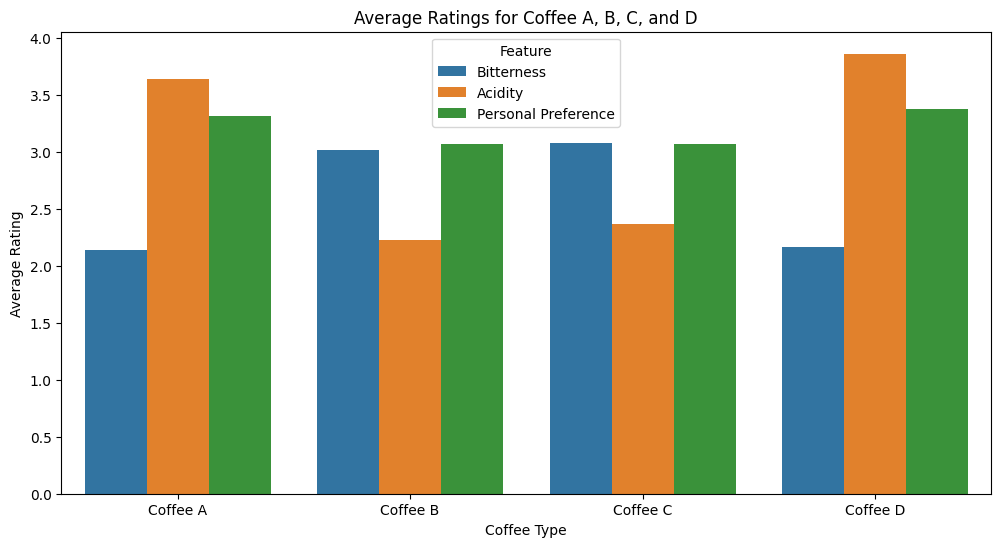

In [98]:

range = data[['coffee_a_bitterness', 'coffee_a_acidity', 'coffee_a_personal_preference',
                       'coffee_b_bitterness', 'coffee_b_acidity', 'coffee_b_personal_preference',
                       'coffee_c_bitterness', 'coffee_c_acidity', 'coffee_c_personal_preference',
                       'coffee_d_bitterness', 'coffee_d_acidity', 'coffee_d_personal_preference']]
plot_data = pd.DataFrame({
    'Coffee': ['Coffee A', 'Coffee B', 'Coffee C', 'Coffee D'],
    'Bitterness': [range['coffee_a_bitterness'].mean(), range['coffee_b_bitterness'].mean(), range['coffee_c_bitterness'].mean(), range['coffee_d_bitterness'].mean()],
    'Acidity': [range['coffee_a_acidity'].mean(), range['coffee_b_acidity'].mean(), range['coffee_c_acidity'].mean(), range['coffee_d_acidity'].mean()],
    'Personal Preference': [range['coffee_a_personal_preference'].mean(), range['coffee_b_personal_preference'].mean(), range['coffee_c_personal_preference'].mean(), range['coffee_d_personal_preference'].mean()]
})
plt.figure(figsize=(12, 6))
sns.barplot(x='Coffee', y='Rating', hue='Feature', data=plot_data_melted)
plt.title('Average Ratings for Coffee A, B, C, and D')
plt.xlabel('Coffee Type')
plt.ylabel('Average Rating')
plt.legend(title='Feature')
plt.show()

In [93]:
prefer_overall =coffee_data['prefer_overall'].dropna()
count = prefer_overall.value_counts()
print("Overall preference count':\n", preference_counts)


Overall preference count':
 prefer_overall
Coffee D    1385
Coffee A     818
Coffee C     784
Coffee B     783
Name: count, dtype: int64


In [100]:
X = data.drop(columns=['coffee_a_notes', 'coffee_b_notes', 'coffee_c_notes', 'coffee_d_notes', 'style', 'roast_level'])
y_style = data['style']
y_roast_level = data['roast_level']


le_style = LabelEncoder()
y_style_encoded = le_style.fit_transform(y_style)


X_train, X_test, y_train, y_test = train_test_split(X, y_style_encoded, test_size=0.2, random_state=42)


clf_style = RandomForestClassifier(random_state=42)


clf_style.fit(X_train, y_train)
y_pred_style = clf_style.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_style))
print(classification_report(y_test, y_pred_style, target_names=le_style.classes_))



Accuracy:  0.3210161662817552
              precision    recall  f1-score   support

        Bold       0.00      0.00      0.00        14
      Bright       0.24      0.12      0.16        34
 Caramalized       0.06      0.03      0.04        35
  Chocolatey       0.28      0.45      0.35        71
      Floral       0.00      0.00      0.00        20
      Fruity       0.43      0.77      0.56       117
 Full Bodied       0.12      0.09      0.10        47
       Juicy       0.21      0.09      0.13        33
       Nutty       0.17      0.12      0.14        26
       Sweet       0.33      0.06      0.10        36

    accuracy                           0.32       433
   macro avg       0.19      0.17      0.16       433
weighted avg       0.26      0.32      0.26       433

